# Regresinės analizės ir algoritmų tyrimas

Šiame laboratoriniame darbe gilinsiuosi į regresinę analizę, naudodamas ją duomenų prognozavimui. Mano tikslas - ištirti duomenų rinkinį, jį apdoroti ir taikyti regresijos metodus pasirinkto kintamojo prognozei.

   * Išanalizuosiu ir paruošiu duomenų rinkinį regresiniam modeliavimui.

   * Įgyvendinsiu įvairius regresijos algoritmus, tokius kaip tiesinė regresija ir polinominė regresija.

   * Įvertinsiu sukurtų regresijos modelių našumą naudodamas atitinkamas metrikas.

## Duomenų rinkinio tyrimas

### Duomenų įkėlimas ir pirminė analizė

Šiame žingsnyje atsisiunčiame ir atidarome ZIP archyvą, išskleidžiame jį ir nuskaitome CSV failą į pandas DataFrame, kad galėtume pradėti analizę.


In [6]:
# Įkeliame reikalingas bibliotekas
import pandas as pd

# Nuskaitome CSV failą į DataFrame
df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
# https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?resource=download

#from google.colab import drive
#drive.mount('/content/drive/***/Lab4/MELBOURNE_HOUSE_PRICES_LESS.csv')

# Peržiūrime pirmas 5 eilutes
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


### Duomenų struktūros ir trūkstamų reikšmių analizė

Atliekame duomenų struktūros analizę, apžvelgiame statistinius rodiklius, identifikuojame trūkstamas reikšmes ir unikalių reikšmių skaičių stulpeliuose.

In [7]:
# Duomenų struktūros apžvalga
df.info()

# Statistinė suvestinė
df.describe()

# Trūkstamų reikšmių kiekis kiekviename stulpelyje
df.isnull().sum()

# Unikalių reikšmių skaičius kiekviename stulpelyje
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


Suburb             380
Address          57754
Rooms               14
Type                 3
Price             3417
Method               9
SellerG            476
Date               112
Postcode           225
Regionname           8
Propertycount      368
Distance           180
CouncilArea         34
dtype: int64

## Pirminis duomenų apdorojimas

### Duomenų valymas

Pašaliname nereikalingus stulpelius ir įrašus su trūkstamomis reikšmėmis svarbiuose stulpeliuose, kad užtikrintume duomenų kokybę tolesnei analizei.

In [8]:
# Pašaliname nereikalingus stulpelius
#df_reduced = df.drop(columns=['brokered_by', 'status', 'street', 'prev_sold_date', 'city', 'zip_code'])
df_reduced = df.drop(columns=['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea'])

# Pašaliname įrašus su trūkstamomis reikšmėmis svarbiuose stulpeliuose
# df_reduced = df_reduced.dropna(subset=['price', 'bed', 'bath', 'acre_lot', 'house_size'])
df_reduced = df_reduced.dropna(subset=['Price', 'Rooms', 'Type', 'Regionname', 'Propertycount', 'Distance'])

# Patikriname, ar liko trūkstamų reikšmių
df_reduced.isnull().sum()


Rooms            0
Type             0
Price            0
Regionname       0
Propertycount    0
Distance         0
dtype: int64

### Kategorinių kintamųjų kodavimas ir skaitinių kintamųjų standartizavimas

Kategorinį kintamąjį 'state' paverčiame skaitiniais vienkartiniais kintamaisiais. Skaitinius požymius standartizuojame, kad jie turėtų vidurkį 0 ir standartinį nuokrypį 1, kas yra naudinga daugeliui mašininio mokymosi algoritmų.

In [9]:
# Vienkarčių (one-hot) kintamųjų kodavimas kategoriniams stulpeliams
df_encoded = pd.get_dummies(df_reduced, columns=['Type', 'Regionname'], drop_first=True)

# Skaitinių stulpelių standartizavimas
from sklearn.preprocessing import StandardScaler

num_features = ['Rooms', 'Propertycount', 'Distance']
scaler = StandardScaler()
df_encoded[num_features] = scaler.fit_transform(df_encoded[num_features])


### Duomenų vizualizacija

Vizualizuojame skaitinių kintamųjų pasiskirstymą, kad identifikuotume galimus išskirtinius taškus (outliers) ir suprastume duomenų struktūrą.

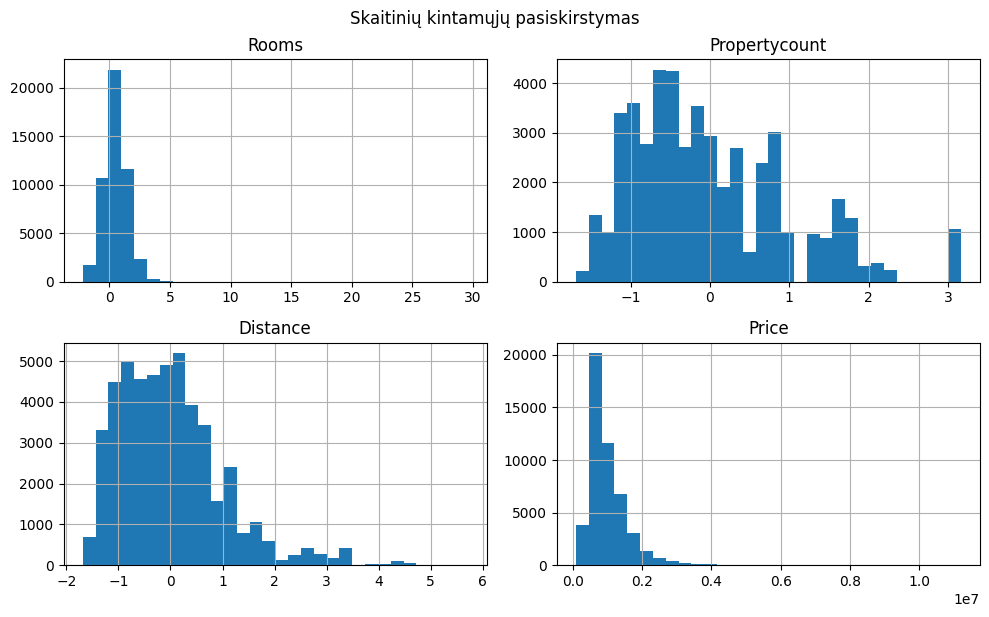

In [10]:
import matplotlib.pyplot as plt

# Skaitinių kintamųjų histogramos
df_encoded[['Rooms', 'Propertycount', 'Distance', 'Price']].hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.suptitle('Skaitinių kintamųjų pasiskirstymas', y=1.02)
plt.show()


### Koreliacijos analizė

Analizuojame koreliacijas tarp kintamųjų, kad suprastume, kurie požymiai labiausiai susiję su kaina ir gali būti naudingi prognozavimo modeliuose.

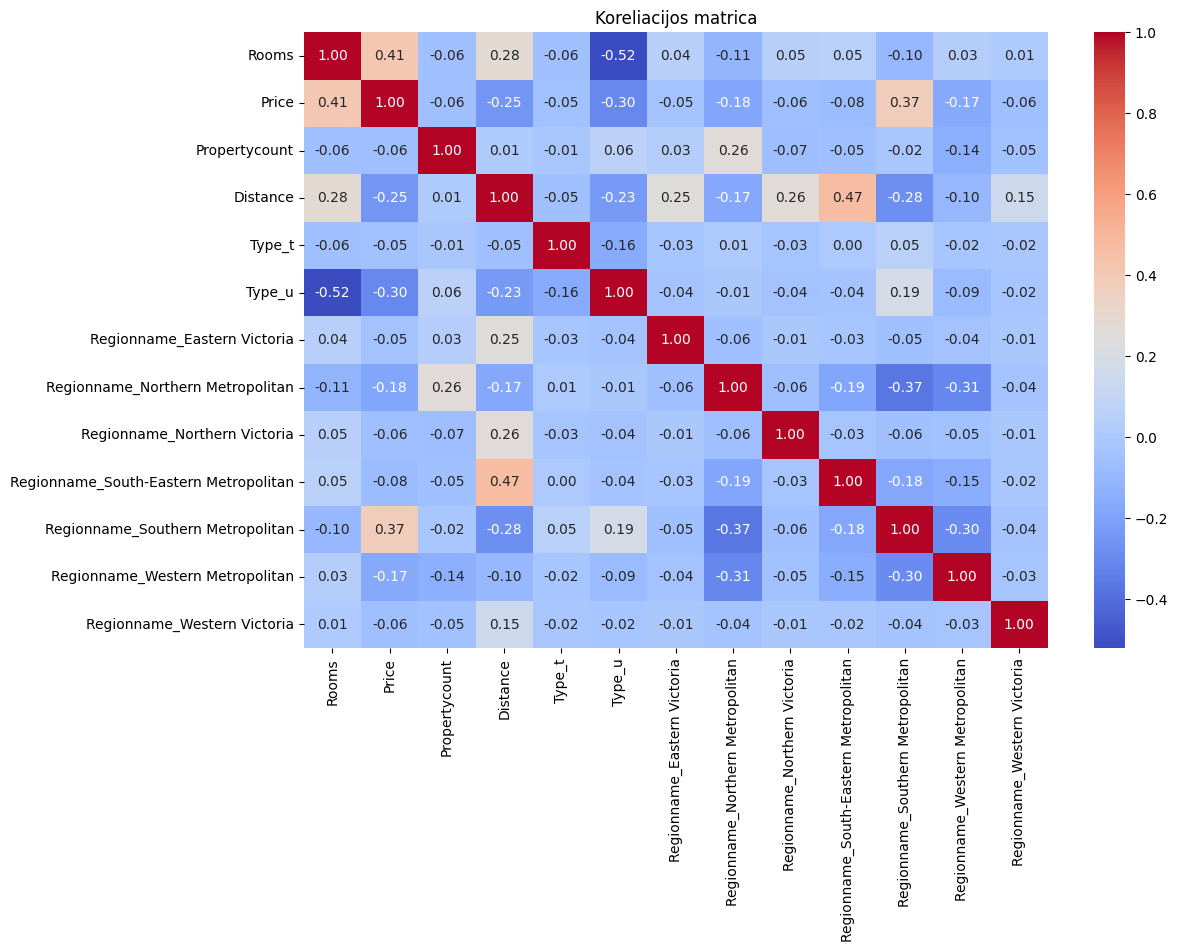

In [11]:
import seaborn as sns

# Koreliacijos matrica
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Koreliacijos matrica")
plt.show()


### Išskirtinių taškų (outliers) pašalinimas

Naudojame Z-reikšmes, kad identifikuotume ir pašalintume išskirtinius taškus, kurie gali neigiamai paveikti modelio tikslumą.

In [12]:
from scipy import stats

# Z-reikšmių skaičiavimas
z_scores = stats.zscore(df_encoded[['Price', 'Rooms', 'Propertycount', 'Distance']])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 4).all(axis=1)

# Filtruojame duomenis
df_final = df_encoded[filtered_entries]


### Duomenų padalijimas į mokymo ir testavimo rinkinius

Padalijame duomenis į mokymo ir testavimo rinkinius, kad galėtume įvertinti modelio gebėjimą generalizuoti naujus duomenis.

In [13]:
from sklearn.model_selection import train_test_split

# Požymiai ir tikslinė reikšmė
X = df_final.drop(columns=['Price'])
y = df_final['Price']

# Duomenų padalijimas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regresinis modeliavimas

### Tiesinės regresijos modelis

Sukuriame ir apmokome tiesinės regresijos modelį, įvertiname jo tikslumą naudodami MAE, MSE ir R2 metrikas.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelio sukūrimas ir apmokymas
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prognozės
y_pred_lr = lin_reg.predict(X_test)

# Modelio įvertinimas
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Tiesinė regresija → MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")


Tiesinė regresija → MAE: 246125.48, MSE: 115616593810.91, R2: 0.57


### Polinominės regresijos modelis

Sukuriame ir apmokome polinominės regresijos modelį, kuris leidžia modeliuoti nelinijinius ryšius tarp kintamųjų.

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Pasirenkame svarbiausius požymius
selected_features = ['Rooms', 'Propertycount', 'Distance']
X_train_poly = X_train[selected_features]
X_test_poly = X_test[selected_features]

# Modelio sukūrimas ir apmokymas
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train)

# Prognozės
y_pred_poly = poly_model.predict(X_test_poly)

# Modelio įvertinimas
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polinominė regresija → MAE: {mae_poly:.2f}, MSE: {mse_poly:.2f}, R2: {r2_poly:.2f}")


Polinominė regresija → MAE: 289118.82, MSE: 157777444496.37, R2: 0.41


### Sprendimų medžio modelis

Naudojame sprendimų medžio modelį, kuris leidžia modeliuoti sudėtingus, nelinijinius ryšius tarp kintamųjų.

In [16]:
from sklearn.tree import DecisionTreeRegressor

# Modelio sukūrimas ir apmokymas
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prognozės
y_pred_tree = tree_model.predict(X_test)

# Modelio įvertinimas
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Sprendimų medis → MAE: {mae_tree:.2f}, MSE: {mse_tree:.2f}, R2: {r2_tree:.2f}")


Sprendimų medis → MAE: 166440.39, MSE: 65846707384.84, R2: 0.76


### Atsitiktinių miškų modelis

Atsitiktinių miškų algoritmas sukuria daugybę sprendimų medžių, kurių kiekvienas apmokomas su atsitiktine duomenų dalimi. Galutinė prognozė gaunama vidurkinant visų medžių prognozes, taip sumažinant perpratimo (overfitting) riziką ir padidinant modelio tikslumą.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sukuriame ir apmokome atsitiktinių miškų modelį
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Atlikime prognozę
y_pred_forest = forest_model.predict(X_test)

# Įvertinkime modelio tikslumą
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Atsitiktinių miškų modelis → MAE: {mae_forest:.2f}, MSE: {mse_forest:.2f}, R2: {r2_forest:.2f}")


Atsitiktinių miškų modelis → MAE: 165649.41, MSE: 64840382284.95, R2: 0.76


### Rekursinio neuroninio tinklo (RNN) modelis

Norint integruoti RNN modelio analizę reikia paruošti duomenis (sekų formatas).


In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_scaled = x_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))

# RNN reikia duomenų 3D formatu: (pavyzdžių skaičius, sekos ilgis, požymių skaičius)
# Tarkime, kiekviena "seka" bus tik vienas laiko žingsnis (galite išplėsti tai ateityje)
X_rnn = np.expand_dims(X_scaled.astype(np.float32), axis=1)  # Pvz. (n, 1, num_features)
y_rnn = y_scaled.astype(np.float32)

# Padaliname į mokymo ir testavimo rinkinius
X_train_sequences, X_test_sequences, y_train_seq, y_test_seq = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# RNN modelio kūrimas
rnn_model = Sequential()
# Increase units and potentially add more layers for complexity
rnn_model.add(SimpleRNN(units=128, activation='relu', input_shape=(X_train_sequences.shape[1], X_train_sequences.shape[2])))
# Add another dense layer
rnn_model.add(Dense(units=64, activation='relu'))
rnn_model.add(Dense(units=1)) # Output layer remains 1 unit for regression

# Modelio kompiliavimas
rnn_model.compile(optimizer='adam', loss='mse')

# Modelio apmokymas - Increase epochs
rnn_model.fit(X_train_sequences, y_train_seq, epochs=150, batch_size=32, verbose=1) # Increased epochs

# Prognozės
y_pred_rnn_scaled = rnn_model.predict(X_test_sequences)

# Inverse transform the predictions to original scale
y_pred_rnn = y_scaler.inverse_transform(y_pred_rnn_scaled)
# Also inverse transform the true values for evaluation/plotting consistency
y_test_rnn_original = y_scaler.inverse_transform(y_test_seq)

# Modelio įvertinimas - using original scale values
mae_rnn = mean_absolute_error(y_test_rnn_original, y_pred_rnn)
mse_rnn = mean_squared_error(y_test_rnn_original, y_pred_rnn)
r2_rnn = r2_score(y_test_rnn_original, y_pred_rnn)

print(f"RNN modelis → MAE: {mae_rnn:.2f}, MSE: {mse_rnn:.2f}, R2: {r2_rnn:.2f}")

Epoch 1/150


e:\Documents\dev\Uni\3k2s\Artificial_Int\Lab4\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - loss: 0.0104
Epoch 2/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - loss: 0.0079
Epoch 3/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 0.0080
Epoch 4/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: 0.0076
Epoch 5/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 0.0077
Epoch 6/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 0.0074
Epoch 7/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - loss: 0.0074
Epoch 8/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - loss: 0.0073
Epoch 9/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - loss: 0.0072
Epoch 10/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - loss: 0.0071
Epoch 11/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - loss: 0.0072
Epoch 12/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - loss: 0.0072
Epoch 13/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - loss: 0.0071
Epoch 14/150
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - loss: 0.0070

### Modelių palyginimas

Palyginti skirtingų regresijos modelių tikslumą naudojant tas pačias metrikas. Ši lentelė leidžia palyginti skirtingų modelių tikslumą pagal MAE, MSE ir R² metrikas.

Naudojame šias metrikas modelio tikslumui įvertinti:

  *  MAE (Mean Absolute Error): Vidutinė absoliuti klaida tarp prognozuotų ir tikrųjų reikšmių.

  *  MSE (Mean Squared Error): Vidutinė kvadratinė klaida, jautri didelėms klaidoms.

  * R² (Determination Coefficient): Parodo, kiek gerai modelis paaiškina duomenų variaciją (1 – tobulas atitikimas).

In [20]:
import pandas as pd

# Sukuriame rezultatų lentelę
results = pd.DataFrame({
    'Modelis': ['Tiesinė regresija', 'Polinominė regresija', 'Sprendimų medis', 'Atsitiktiniai miškai', 'RNN (rekursinis neuroninis tinklas)'],
    'MAE': [mae_lr, mae_poly, mae_tree, mae_forest, mae_rnn],
    'MSE': [mse_lr, mse_poly, mse_tree, mse_forest, mse_rnn],
    'R2': [r2_lr, r2_poly, r2_tree, r2_forest, r2_rnn]
})

# Atvaizduojame rezultatus
results


,Modelis,MAE,MSE,R2
0,Tiesinė regresija,246125.475677,1.156166e+11,0.570640
1,Polinominė regresija,289118.823871,1.577774e+11,0.414069
2,Sprendimų medis,166440.394431,6.584671e+10,0.755468
3,Atsitiktiniai miškai,165649.408736,6.484038e+10,0.759205
4,RNN (rekursinis neuroninis tinklas),174363.953125,7.072109e+10,0.737366


## Atsitiktinių miškų modelio rezultatų vizualizacija.

### Prognozuotų ir tikrųjų kainų palyginimas

Ši sklaidos diagrama leidžia įvertinti, kaip arti prognozuotos kainos yra tikrųjų kainų. Idealiu atveju taškai turėtų būti arti raudonos linijos, kuri žymi tobulą prognozę.

Histogramoje matome, kaip pasiskirsto prognozės klaidos. Simetriškas pasiskirstymas aplink nulį rodo, kad modelis nėra šališkas prognozuojant per dideles ar per mažas kainas.

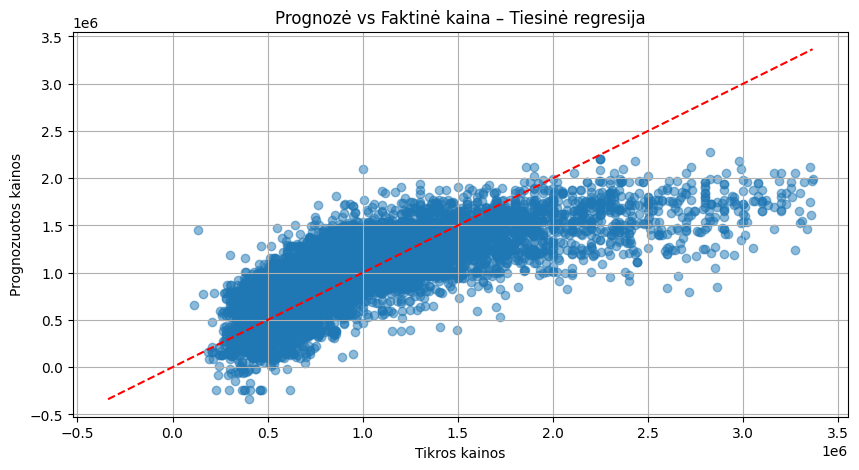

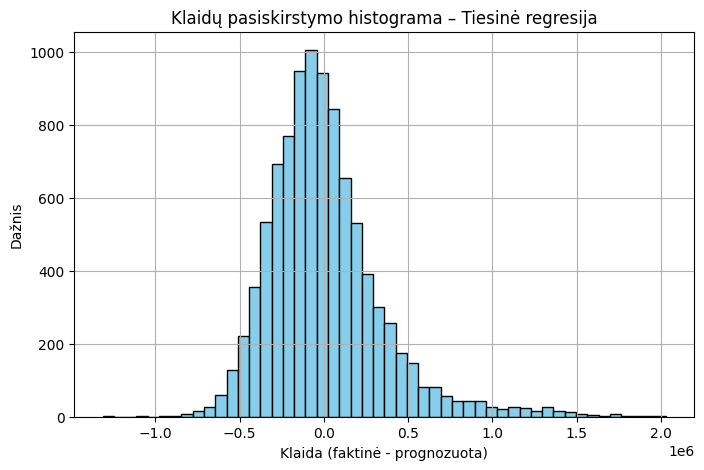

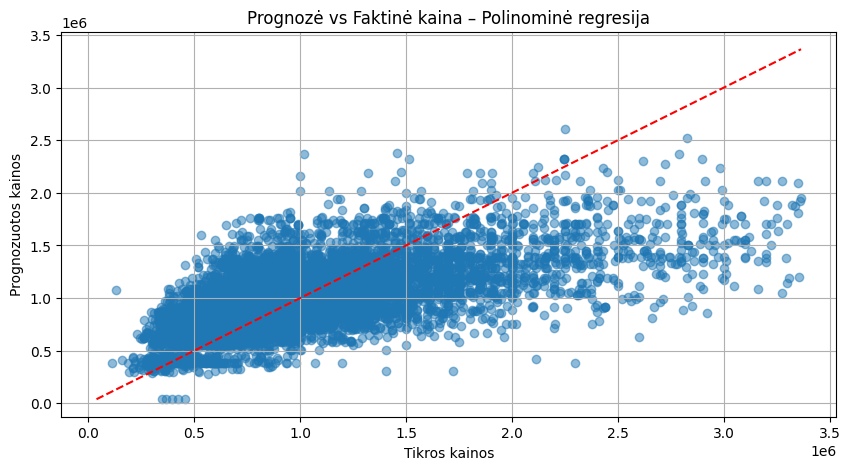

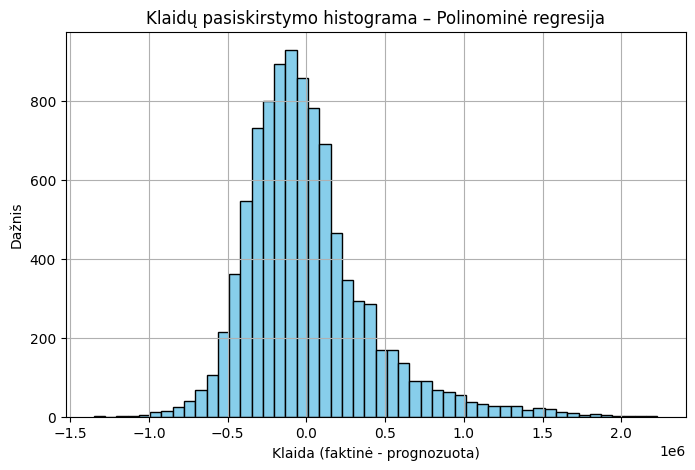

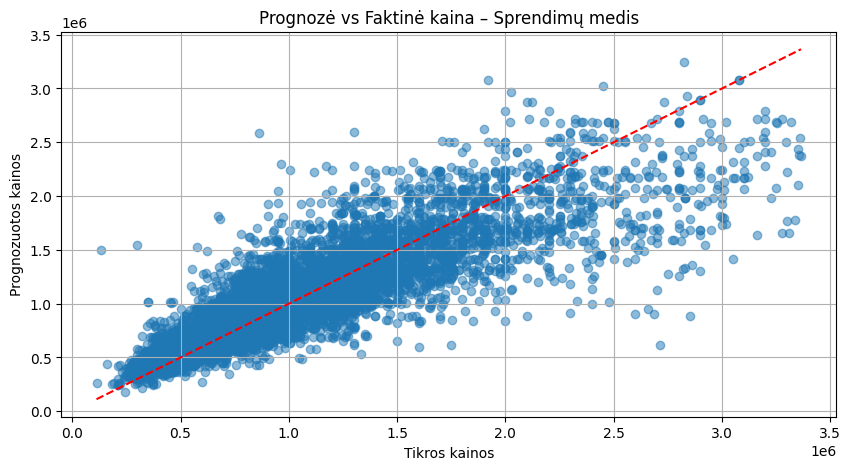

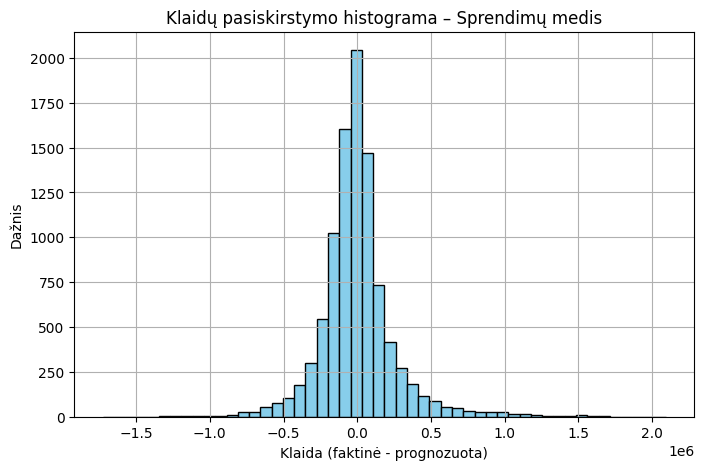

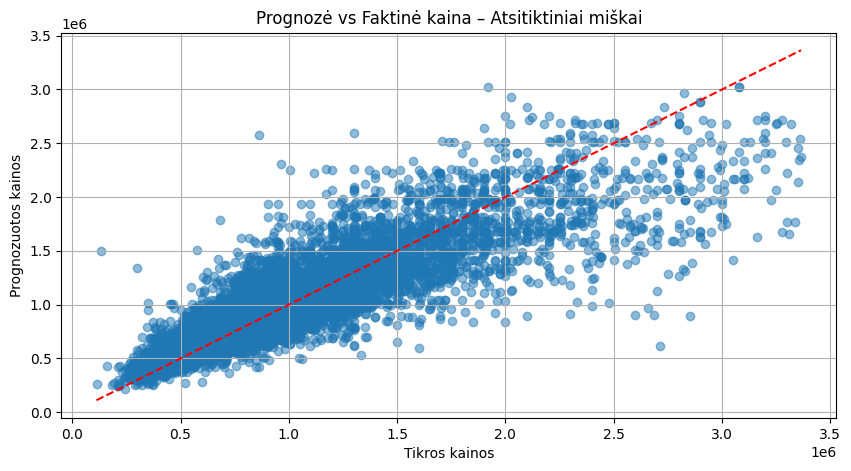

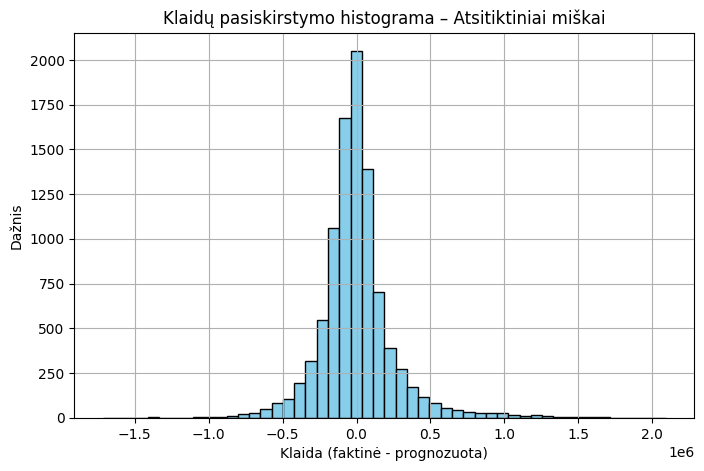

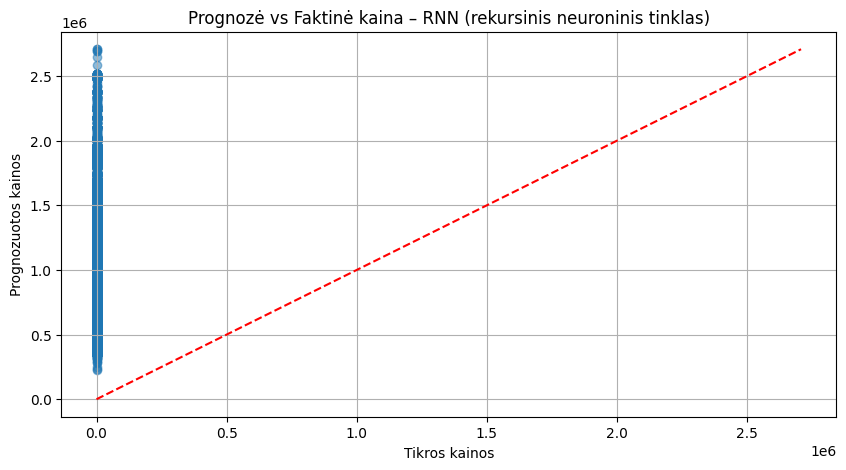

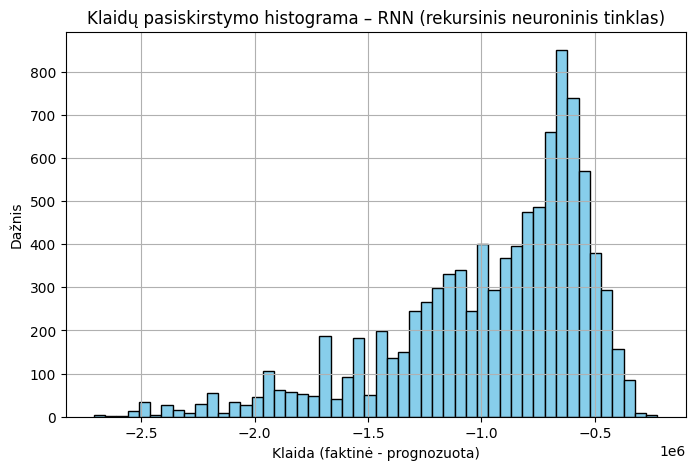

In [21]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    # Ensure y_pred is 1D for scatter plot
    if y_pred.ndim > 1:
          y_pred = y_pred.ravel()
    # Also ensure y_true is 1D
    if isinstance(y_true, np.ndarray) and y_true.ndim > 1:
         y_true = y_true.ravel()
    elif isinstance(y_true, pd.Series):
        y_true = y_true.values # Convert Series to numpy array for consistency

    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel("Tikros kainos")
    plt.ylabel("Prognozuotos kainos")
    plt.title(f"Prognozė vs Faktinė kaina – {model_name}")
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.grid(True)
    plt.show()

def plot_residuals(y_true, y_pred, model_name):
    # Ensure y_pred is 1D
    if y_pred.ndim > 1:
        y_pred = y_pred.ravel()
    # Ensure y_true is 1D
    if isinstance(y_true, np.ndarray) and y_true.ndim > 1:
         y_true = y_true.ravel()
    elif isinstance(y_true, pd.Series):
        y_true = y_true.values # Convert Series to numpy array for consistency

    # Calculate residuals with flattened arrays
    residuals = y_true - y_pred

    plt.figure(figsize=(8, 5))
    plt.hist(residuals, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"Klaidų pasiskirstymo histograma – {model_name}")
    plt.xlabel("Klaida (faktinė - prognozuota)")
    plt.ylabel("Dažnis")
    plt.grid(True)
    plt.show()

model_results = {
    "Tiesinė regresija": (y_test, y_pred_lr),
    "Polinominė regresija": (y_test, y_pred_poly),
    "Sprendimų medis": (y_test, y_pred_tree),
    "Atsitiktiniai miškai": (y_test, y_pred_forest),
    "RNN (rekursinis neuroninis tinklas)": (y_test_seq, y_pred_rnn) # <--- This line needs change}
}

for name, (y_true, y_pred) in model_results.items():
    plot_predictions(y_true, y_pred, name)
    plot_residuals(y_true, y_pred, name)



In [22]:
df_final.describe()

,Rooms,Price,Propertycount,Distance
count,47792.000000,4.779200e+04,47792.000000,47792.000000
mean,-0.020090,9.716515e+05,0.002625,-0.011599
std,0.965284,5.080248e+05,1.000549,0.963013
min,-2.192940,8.500000e+04,-1.678886,-1.682496
25%,-1.134401,6.200000e+05,-0.734157,-0.755337
50%,-0.075861,8.300000e+05,-0.180241,-0.132817
75%,0.982678,1.205000e+06,0.638405,0.529439
max,3.099756,3.365000e+06,3.159628,3.893699
